# Sales Data Analysis

This notebook performs an in-depth analysis of sales data to identify key trends, best-performing products, optimal sales times, and geographical insights. The main objectives include understanding monthly sales performance, identifying top-selling products, determining ideal advertising times, and analyzing sales by city.

## Data Loading and Merging

This section is dedicated to loading the individual monthly sales data files, merging them into a single comprehensive DataFrame, and performing an initial inspection of the combined dataset. This process ensures all sales records are consolidated for subsequent analysis and provides a first look at the data's structure and potential issues.

In [520]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Merging 12 Months of sales data into 1
files = [file for file in os.listdir('/content/drive/MyDrive/Datasets/SalesAnalysis/Sales_Data')]
data = pd.DataFrame()
for file in files:
  df = pd.read_csv('/content/drive/MyDrive/Datasets/SalesAnalysis/Sales_Data/' + file)
  data = pd.concat([data, df])

print('Data loading and merging complete. Initial inspection:')

display(data.sample())
print('\nColumns:')
display(data.columns)
print('\nData Info:')
display(data.info())
print('\nNon-null counts:')
display(data.count())
print('\nNull value counts:')
display(data.isnull().sum())

Data loading and merging complete. Initial inspection:


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
8841,202495,Macbook Pro Laptop,1,1700,05/21/19 16:19,"703 10th St, New York City, NY 10001"



Columns:


Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')


Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 16634
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


None


Non-null counts:


,0
Order ID,186305
Product,186305
Quantity Ordered,186305
Price Each,186305
Order Date,186305
Purchase Address,186305



Null value counts:


,0
Order ID,545
Product,545
Quantity Ordered,545
Price Each,545
Order Date,545
Purchase Address,545


### Initial Data Inspection Summary

The `data` DataFrame, compiled from 12 months of sales records, contains **186,850 entries** and **6 columns**.

**Columns and Data Types:**
All columns (`Order ID`, `Product`, `Quantity Ordered`, `Price Each`, `Order Date`, `Purchase Address`) are currently of `object` type. This indicates that numerical and date-time data are stored as strings and will require type conversion for proper analysis.

**Missing Values:**
Each of the 6 columns has **545 non-null values** (from `data.count()`) out of 186,850 total entries, meaning there are **545 null values** in each column (`data.isnull().sum()`). These missing values need to be addressed before proceeding with further analysis. The presence of NaN in all columns for these 545 rows suggests that these are entirely empty rows introduced during the data merging process or present in the original files.

In [521]:
print("Starting Data Cleaning and Preprocessing...")

# --- Step 1: Handling Missing Values ---
# Display initial info to show nulls before dropping
print("\n--- Before dropping NaN values ---")
display(data.info())
display(data.isnull().sum())

# Drop rows with any NaN values
data.dropna(inplace=True)
# Reset index after dropping rows to ensure a continuous index
data.reset_index(drop=True, inplace=True)

# Display info after dropping nulls to confirm cleanliness
print("\n--- After dropping NaN values ---")
display(data.info())
display(data.isnull().sum())

# --- Step 2: Standardize Column Names ---
# Remove leading/trailing spaces and replace spaces with underscores in column names
data.columns = data.columns.map(lambda x: x.strip().replace(' ', '_'))
print("\n--- Column names standardized ---")
display(data.columns)

# --- Step 3: Extract and Clean 'Order_Month' Column ---
# Extract the first two characters of 'Order_Date' to create 'Order_Month'
data['Order_Month'] = data['Order_Date'].str[0:2]

# Check for non-numeric values (like 'Or') in 'Order_Month' and remove them
# 'Or' values typically arise from header rows being concatenated into the data
data = data[data['Order_Month'] != 'Or']

# Convert 'Order_Month' to integer type for numerical analysis
data['Order_Month'] = data['Order_Month'].astype(int)

print("\n--- 'Order_Month' extracted and cleaned ---")
display(data['Order_Month'].unique())
display(data.head())

# --- Step 4: Convert 'Quantity_Ordered' and 'Price_Each' to Numeric Data Types ---
# Convert 'Price_Each' to float
data['Price_Each'] = data['Price_Each'].astype(float)
# Convert 'Quantity_Ordered' to integer
data['Quantity_Ordered'] = data['Quantity_Ordered'].astype(int)

print("\n--- 'Quantity_Ordered' and 'Price_Each' converted to numeric types ---")
display(data.info())

# --- Step 5: Calculate 'Total_Price' Column ---
# Calculate the 'Total_Price' for each order item
data['Total_Price'] = data['Quantity_Ordered'] * data['Price_Each']

print("\n--- 'Total_Price' column calculated ---")
display(data.head())

print("Data Cleaning and Preprocessing Complete.")

Starting Data Cleaning and Preprocessing...

--- Before dropping NaN values ---
<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 16634
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


None

,0
Order ID,545
Product,545
Quantity Ordered,545
Price Each,545
Order Date,545
Purchase Address,545



--- After dropping NaN values ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186305 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


None

,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0



--- Column names standardized ---


Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')


--- 'Order_Month' extracted and cleaned ---


array([ 7,  8,  6,  4,  5, 11, 12,  1,  3, 10,  2,  9])

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Order_Month
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7



--- 'Quantity_Ordered' and 'Price_Each' converted to numeric types ---
<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186304
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity_Ordered  185950 non-null  int64  
 3   Price_Each        185950 non-null  float64
 4   Order_Date        185950 non-null  object 
 5   Purchase_Address  185950 non-null  object 
 6   Order_Month       185950 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 11.3+ MB


None


--- 'Total_Price' column calculated ---


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Order_Month,Total_Price
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95


Data Cleaning and Preprocessing Complete.


### Handling Missing Values

Before proceeding with the analysis, it's crucial to address missing values in the dataset. Missing values can skew results and lead to inaccurate conclusions. This step identifies and removes rows containing any null entries to ensure data integrity.

### Extracting and Cleaning 'Order Month'

This step involves creating a new column, 'Order_Month', from the 'Order_Date' column. Initially, the month is extracted as a string. A crucial part of this process is identifying and removing any rows where the 'Order_Month' might contain non-numeric values (e.g., 'Or', which often appears when header rows are incorrectly concatenated). Finally, the 'Order_Month' column is converted to an integer data type for proper numerical analysis.

### Converting Data Types for 'Quantity_Ordered' and 'Price_Each'

To enable proper mathematical operations and analysis, the 'Quantity_Ordered' and 'Price_Each' columns, which were initially imported as objects (strings), need to be converted to appropriate numeric data types. 'Quantity_Ordered' is converted to an integer, and 'Price_Each' is converted to a float to preserve decimal values.

### Calculating 'Total_Price'

After ensuring 'Quantity_Ordered' and 'Price_Each' are numeric, a new column named 'Total_Price' is calculated. This column represents the total revenue for each individual order item, obtained by multiplying the 'Quantity_Ordered' by the 'Price_Each'. This is a fundamental step for all subsequent sales analysis.

### Monthly Sales Performance Analysis

/tmp/ipython-input-620595627.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=month_sales.index, y=month_sales.values, palette='viridis')


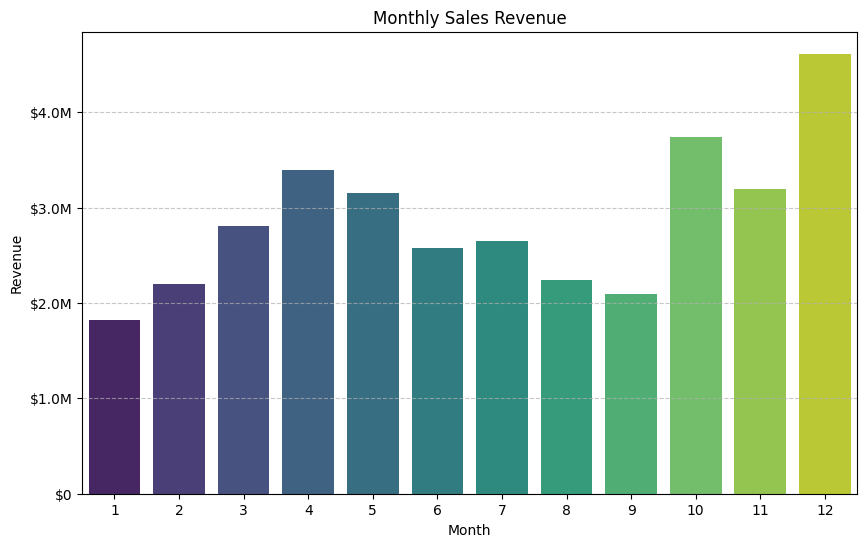


Best month for sales was 12 and the revenue from that month was $4,613,443.34


In [522]:
import matplotlib.ticker as ticker

# Calculate total sales for each month
month_sales = data.groupby('Order_Month')['Total_Price'].sum()

# Create the bar plot for monthly sales
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=month_sales.index, y=month_sales.values, palette='viridis')

# Define a function to format currency for Y-axis labels
def currency_formatter(x, pos):
    if x >= 1_000_000:
        return f'${x*1e-6:1.1f}M'
    elif x >= 1_000:
        return f'${x*1e-3:1.0f}K'
    else:
        return f'${x:1.0f}'

# Apply the formatter to the y-axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(currency_formatter))

plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Sales Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Identify and print the best month for sales and its revenue
best_month_sales = data.groupby('Order_Month')['Total_Price'].sum().sort_values(ascending=False).head(1)
print(f"\nBest month for sales was {best_month_sales.index[0]} and the revenue from that month was ${best_month_sales.values[0]:,.2f}")

### Observations on Monthly Sales

The analysis of monthly sales revenue reveals a clear pattern and identifies peak selling periods. December stands out as the best month for sales, generating a significant revenue of **$4,613,443.34**. This is likely due to holiday shopping. November also shows strong sales, indicating an upward trend leading into the holiday season.

The sales generally show an increasing trend towards the end of the year, with a dip in September and October before peaking in November and December. The first few months of the year, particularly January and February, show lower sales figures compared to the latter half of the year. This suggests seasonal purchasing behavior, with consumers spending more during the holiday period.

## Which products generate the most revenue?

This section calculates the total revenue for each product by grouping the sales data by 'Product' and summing the 'Total_Price' for each product. This will help identify the top-performing products in terms of revenue generated.

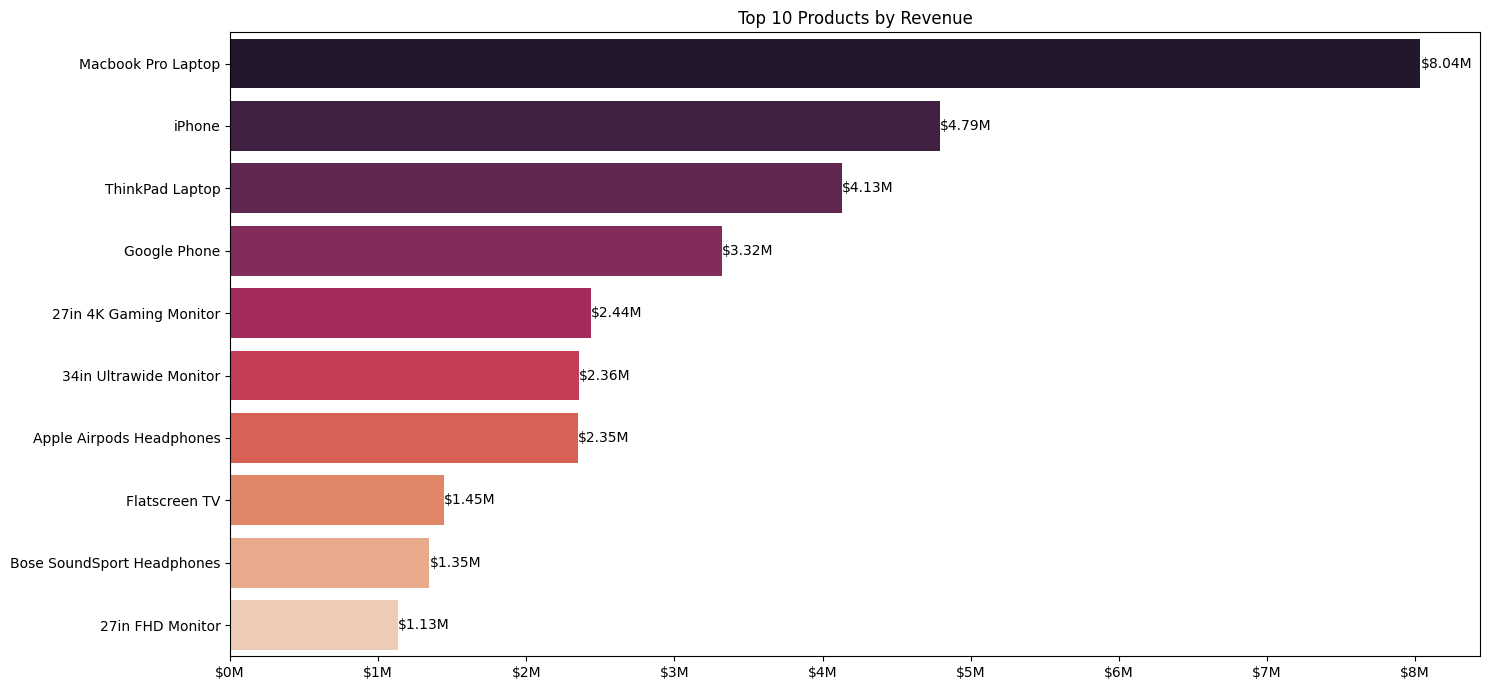


Top 10 Products by Revenue:
Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Name: Total_Price, dtype: float64


In [533]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Calculate the total revenue for each product
gb = data.groupby('Product')['Total_Price'].sum()

# Sort these product revenues in descending order and select the top 10 products
gb_sorted = gb.sort_values(ascending=False).head(10)

# Generate a horizontal bar plot to visualize the top 10 products by revenue
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=gb_sorted.values / 1_000_000, y=gb_sorted.index, palette='rocket', hue=gb_sorted.index, legend=False)

# Add data labels to the bars for clarity
for container in ax.containers:
    ax.bar_label(container, fmt='$%.2fM')

# Format the x-axis to display revenue in millions
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%.fM'))

# Add appropriate labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('Top 10 Products by Revenue')
plt.tight_layout()
plt.show()

print("\nTop 10 Products by Revenue:")
print(gb_sorted)

### Observations on Product Sales Revenue

The product sales analysis reveals several key insights into which products are driving the most revenue.

**Top Performing Products:**
- **Macbook Pro Laptop** leads significantly, generating an impressive `$8.04M` in revenue. This indicates a strong demand for high-end computing devices.
- **iPhone** follows closely with `$4.79M`, highlighting the continued popularity and premium pricing of Apple's smartphone.
- `ThinkPad Laptop`and `Google Phone` also contribute substantially with `$4.13M` and `$3.32M`respectively, suggesting a healthy market for alternative high-end laptops and smartphones.
- **27in 4K Gaming Monitor** and **34in Ultrawide Monitor** show strong performance, indicating a growing demand for high-quality display units, possibly driven by gaming and professional users.
- **Apple Airpods Headphones** with **$2.35M** revenue signify the popularity of wireless audio accessories.

**Key Observations:**
The revenue data clearly shows that higher-priced electronics, particularly laptops and smartphones, are the primary drivers of sales revenue. Accessories like headphones and charging cables, while sold in higher quantities (as seen in later analysis), contribute less to overall revenue due to their lower price points. This suggests a strategy focusing on high-value items can significantly boost overall revenue.

## Which products are most frequently ordered?

### Calculating Most Frequently Ordered Products

To identify which products are most frequently ordered, we group the dataset by the 'Product' column and then sum the 'Quantity_Ordered' for each product. This sum represents the total number of units sold for each product. The resulting quantities are then sorted in descending order to highlight the products with the highest sales volume.

### Visualizing Most Frequently Ordered Products

This bar chart illustrates the top products by the total quantity ordered. It provides a visual representation of which products are most popular among customers, aiding in inventory management and marketing strategies.

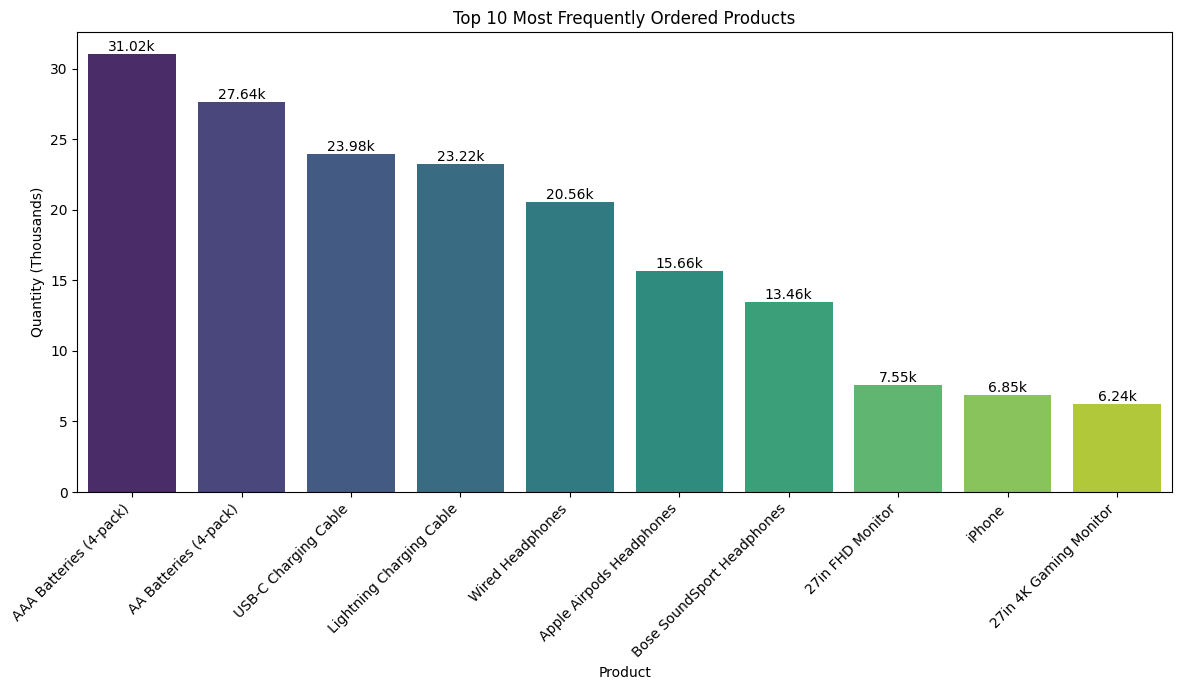


Top 10 Most Frequently Ordered Products (Total Quantity Ordered):
Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
Name: Quantity_Ordered, dtype: int64


In [524]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the total quantity ordered for each product
most_orders = data.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending=False).head(10)

# Create a bar plot to visualize the most frequently ordered products
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=most_orders.index, y=most_orders.values / 1_000, palette='viridis', hue=most_orders.index, legend=False)

# Add data labels to the bars, formatted to show 'k' for thousands
for container in ax.containers:
  ax.bar_label(container, fmt='%.2fk')

# Add appropriate labels and title
plt.xlabel('Product')
plt.ylabel('Quantity (Thousands)')
plt.title('Top 10 Most Frequently Ordered Products')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

print("\nTop 10 Most Frequently Ordered Products (Total Quantity Ordered):")
print(most_orders)

### Observations on Most Frequently Ordered Products

Analyzing the total quantity of products ordered reveals a different perspective compared to revenue. While high-priced items like laptops and iPhones drive significant revenue, the most frequently ordered products tend to be lower-priced accessories.

**Top Frequently Ordered Products:**
- **AAA Batteries (4-pack)** and **AA Batteries (4-pack)** are by far the most ordered items, with 31,017 and 27,635 units respectively. This is expected as batteries are essential, consumable, and relatively inexpensive.
- **USB-C Charging Cable** and **Lightning Charging Cable** also show very high order volumes (23,975 and 23,217 units). These are critical accessories for many electronic devices and are prone to loss or damage, leading to frequent repurchases.
- **Wired Headphones**, **Apple Airpods Headphones**, and **Bose SoundSport Headphones** are also highly ordered, indicating a strong market for audio accessories.

**Key Observations:**
This analysis highlights that while expensive items contribute the most to revenue, cheaper, essential accessories are sold in much larger volumes. This suggests that marketing strategies could focus on bundling these high-volume accessories with their compatible main products, or promoting them as standalone essential items. The frequent purchase of batteries and charging cables points to their necessity and short lifespan or easy misplacement.

## Which city has the highest sales?

### Extracting City and State Information

To analyze sales by geographical location, a new 'City' column is created by extracting city and state information from the 'Purchase_Address' column. This involves parsing the 'Purchase_Address' string to isolate the relevant city and state abbreviations, which are then combined into a standardized format for consistency in grouping and analysis. This step ensures that sales data can be accurately attributed to specific urban areas.

In [525]:
print("Extracting City and State information...")

# Define helper functions to extract city and state from the Purchase_Address
def get_city(address):
  return address.split(',')[1].strip() # Use .strip() to remove leading/trailing spaces
def get_state(address):
  return address.split(',')[2].split(' ')[1].strip() # Use .strip() to remove leading/trailing spaces

# Apply the functions to create the 'City' column in the desired format
data['City'] = data['Purchase_Address'].apply(lambda x :f"{get_city(x)} ({get_state(x)})")

print("Unique cities extracted:")
display(data['City'].unique())
print("First few rows with new 'City' column:")
display(data.head())

Extracting City and State information...
Unique cities extracted:


array(['Atlanta (GA)', 'Seattle (WA)', 'San Francisco (CA)',
       'New York City (NY)', 'Los Angeles (CA)', 'Dallas (TX)',
       'Boston (MA)', 'Portland (OR)', 'Austin (TX)', 'Portland (ME)'],
      dtype=object)

First few rows with new 'City' column:


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Order_Month,Total_Price,City
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta (GA)
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,Seattle (WA)
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta (GA)
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta (GA)
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle (WA)


### Calculating Total Revenue by City

To understand the sales performance across different geographical areas, the total revenue generated in each city is calculated. This involves grouping the DataFrame by the newly created 'City' column and summing the 'Total_Price' for all sales within each city. This aggregation provides insights into which urban centers are contributing the most to overall sales.

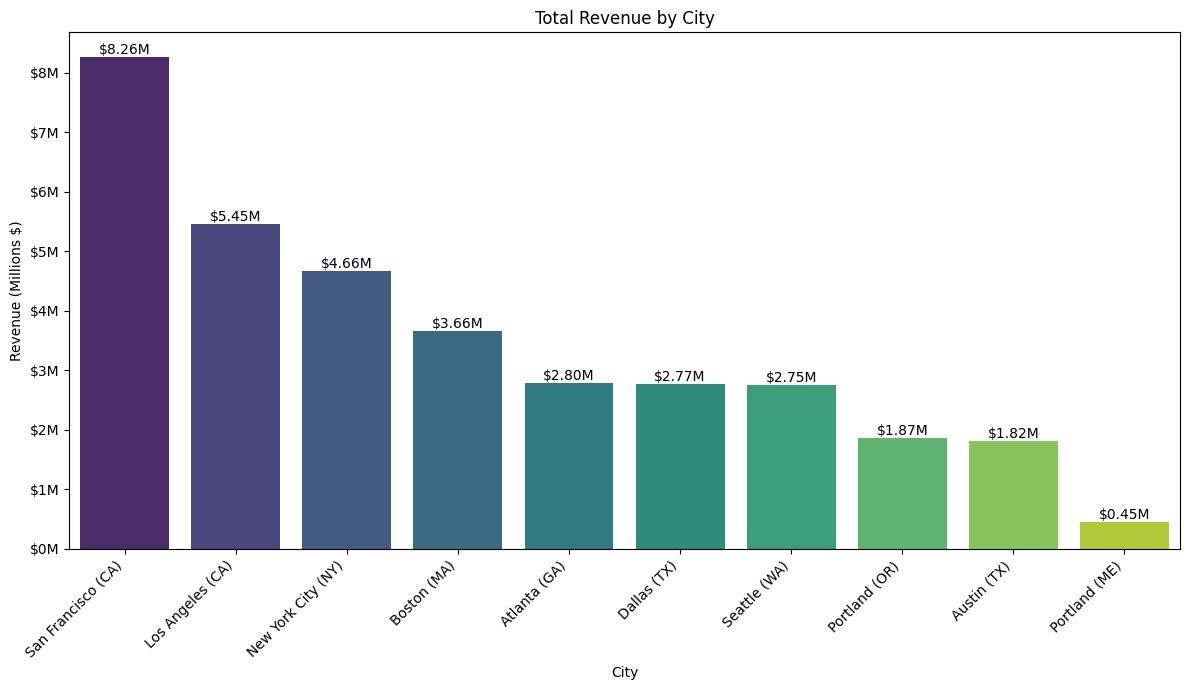


Total Revenue by City (Sorted):
City
San Francisco (CA)    8262203.91
Los Angeles (CA)      5452570.80
New York City (NY)    4664317.43
Boston (MA)           3661642.01
Atlanta (GA)          2795498.58
Dallas (TX)           2767975.40
Seattle (WA)          2747755.48
Portland (OR)         1870732.34
Austin (TX)           1819581.75
Portland (ME)          449758.27
Name: Total_Price, dtype: float64


In [526]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total revenue for each city
revenue_by_city = data.groupby('City')['Total_Price'].sum().sort_values(ascending=False)

# Visualize the revenue by city
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=revenue_by_city.index, y=revenue_by_city.values / 1_000_000, palette='viridis', hue=revenue_by_city.index, legend=False)

# Add data labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='$%.2fM')

# Format the y-axis to display revenue in millions
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('$%.fM'))

plt.xticks(rotation=45, ha='right')
plt.title('Total Revenue by City')
plt.ylabel('Revenue (Millions $)')
plt.xlabel('City')
plt.tight_layout()
plt.show()

print("\nTotal Revenue by City (Sorted):")
print(revenue_by_city)

### Observations on Sales by City

The analysis of sales revenue by city reveals significant geographical variations in sales performance.

**Top Performing Cities:**
- **San Francisco (CA)** is the leading city in terms of revenue, generating `$8.26M`.This indicates a strong market presence and customer base in this region.
- **Los Angeles (CA)** and **New York City (NY)** follow with substantial revenues of `$5.45M` and `$4.66M`, respectively. These major metropolitan areas are expected to be high-performing due to their large populations and economic activity.
- **Boston (MA)** and **Atlanta (GA)** also show strong sales, contributing `$3.66M` and `$2.79M`.

**Key Observations:**
- The top-performing cities are generally large urban centers with high population densities, suggesting a correlation between population size and sales volume.
- There's a considerable drop-off in revenue from the top-tier cities to the lower-tier ones, with Portland (ME) generating the least revenue at **$0.45M**.
- This geographical insight can be crucial for targeted marketing campaigns, optimizing logistics, and potentially expanding sales efforts in areas with higher potential or for addressing underperforming regions.

## Analyze Optimal Advertisement Time


Identify the optimal advertisement times by analyzing revenue patterns across hours, visualize the findings, and summarize observations.


### Extracting Time Information

To analyze sales patterns throughout the day, it's essential to convert the `Order_Date` column into a proper datetime format. Once converted, we can easily extract granular time components such as the hour and minute of each order. This step enables us to group sales data by specific times and identify hourly trends.

In [527]:
print("Converting 'Order_Date' to datetime and extracting 'Hour' and 'Minute'...")

# Convert 'Order_Date' to datetime objects
data['Order_Date'] = pd.to_datetime(data['Order_Date'], errors='coerce')

# Extract the hour and minute from the 'Order_Date'
data['Hour'] = data['Order_Date'].dt.hour
data['Minute'] = data['Order_Date'].dt.minute

print("DataFrame head with new 'Hour' and 'Minute' columns:")
display(data.head())

Converting 'Order_Date' to datetime and extracting 'Hour' and 'Minute'...


/tmp/ipython-input-2905382600.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Order_Date'] = pd.to_datetime(data['Order_Date'], errors='coerce')


DataFrame head with new 'Hour' and 'Minute' columns:


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Order_Month,Total_Price,City,Hour,Minute
0,222910,Apple Airpods Headphones,1,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta (GA),16,51
1,222911,Flatscreen TV,1,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101",7,300.00,Seattle (WA),8,55
2,222912,AA Batteries (4-pack),1,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta (GA),12,41
3,222913,AA Batteries (4-pack),1,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta (GA),10,15
4,222914,AAA Batteries (4-pack),5,2.99,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle (WA),2,13


### Visualizing Revenue by Time

To identify the optimal times for displaying advertisements, we will analyze the total revenue generated during each hour of the day. A line plot will illustrate the hourly sales trends, allowing us to pinpoint peak sales periods when customers are most likely to make purchases.

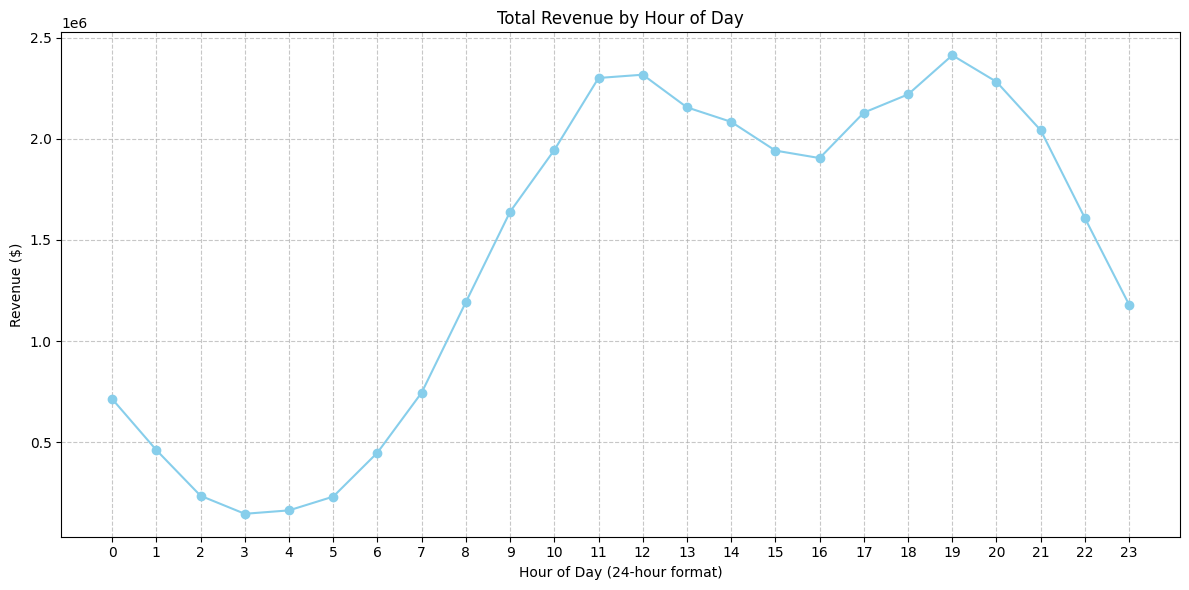

In [534]:
import matplotlib.pyplot as plt

# Group by 'Hour' and sum 'Total_Price' to get hourly revenue
hourly_revenue = data.groupby('Hour')['Total_Price'].sum()

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(hourly_revenue.index, hourly_revenue.values, marker='o', linestyle='-', color='skyblue')

# Set title and labels
plt.title('Total Revenue by Hour of Day')
plt.xlabel('Hour of Day (24-hour format)')
plt.ylabel('Revenue ($)')

# Ensure all 24 hours are visible on the x-axis ticks
plt.xticks(hourly_revenue.index)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Observations on Optimal Advertisement Time

Analyzing the hourly sales revenue reveals clear patterns in customer purchasing behavior throughout the day, which is critical for optimizing advertisement timing.

**Peak Sales Hours:**
- The plot shows two significant peaks in revenue: one around **11 AM - 12 PM (noon)** and another much stronger peak around **6 PM - 7 PM (18:00 - 19:00)**.
- Sales start relatively low in the early morning, gradually increase, reach a midday peak, dip slightly in the afternoon, and then surge in the evening.

**Optimal Advertisement Times:**
- Based on these patterns, the most optimal times to display advertisements would be just before or during these peak periods.
- **Around 10 AM - 12 PM:** Many customers might be on a lunch break or browsing during the late morning, making this a good window for initial engagement.
- **Around 5 PM - 7 PM:** This is the strongest peak, likely corresponding to people finishing work, commuting, or relaxing at home. Advertising during this time could capture a large audience with increased purchasing intent.

**Considerations:**
- While late evening (after 9 PM) sees declining sales, there's still activity, suggesting a smaller but potentially engaged audience.
- Early morning (before 8 AM) has the lowest sales, indicating it might be less effective for broad advertising campaigns, though niche audiences could still be targeted.

In conclusion, focusing advertisement efforts in the late morning and especially the early evening would maximize visibility during periods of high customer activity and purchasing likelihood.

## Analyze Products Often Sold Together


Identify products that are frequently purchased together.


### Identifying Multiple-Product Orders

To determine which products are often sold together, the first step is to identify orders where more than one product was purchased. This is achieved by filtering the dataset to include only `Order_ID`s that appear more than once. These duplicated `Order_ID`s indicate that a single customer bought multiple items in the same transaction, making these orders relevant for combination analysis.

### Grouping Products within Orders

Once multi-product orders are identified, the next step is to group the products associated with each unique `Order_ID`. This involves creating a new column where all products within the same order are listed together, typically as a comma-separated string. This grouped list then serves as the basis for analyzing product combinations, allowing us to see which items are frequently bought side-by-side by customers.

In [535]:
from itertools import combinations
from collections import Counter

print("Identifying products often sold together...")

# Filter the DataFrame to include only Order_IDs that appear more than once
df = data[data['Order_ID'].duplicated(keep=False)].copy()

# Group products within the same Order_ID
df['Grouped'] = df.groupby('Order_ID')['Product'].transform(lambda x: ','.join(x))

# Drop duplicates so each Order_ID with grouped products appears only once
df_grouped = df[['Order_ID', 'Grouped']].drop_duplicates().copy()

# Use Counter to count combinations of 2 products
count = Counter()
for row in df_grouped['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

print("Top 10 most common product combinations:")
# Display the top 10 most common combinations
most_common_combinations = count.most_common(10)
display(most_common_combinations)


Identifying products often sold together...
Top 10 most common product combinations:


[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### Observations on Products Sold Together

Analyzing products frequently sold together provides valuable insights for bundling, cross-selling, and targeted marketing strategies. The analysis focuses on identifying which product pairs are most commonly purchased in the same transaction.

**Top Product Combinations:**
- The most common combination is **'iPhone' and 'Lightning Charging Cable'** (1005 times). This is highly intuitive, as a charging cable is an essential accessory for an iPhone.
- Following closely are **'Google Phone' and 'USB-C Charging Cable'** (987 times), demonstrating a similar pattern for Android devices.
- Other significant pairings include **'iPhone' with 'Wired Headphones'** (447 times) and **'Google Phone' with 'Wired Headphones'** (414 times), suggesting customers often purchase basic audio accessories with their new phones.
- Combinations like **'Vareebadd Phone' and 'USB-C Charging Cable'**, and **'iPhone' and 'Apple Airpods Headphones'** also appear frequently.

**Implications for Marketing and Bundling:**
- **Bundling Opportunities:** The strong co-occurrence of phones with their respective charging cables and headphones presents a clear opportunity for creating product bundles. Offering these items together at a slight discount could increase average transaction value.
- **Cross-Selling:** When a customer purchases an iPhone, the system could recommend a Lightning Charging Cable or Wired Headphones. Similarly, for Google Phone buyers, a USB-C Charging Cable or Wired Headphones could be suggested.
- **Inventory Management:** Understanding these pairings can help optimize inventory, ensuring that popular accessories are well-stocked alongside their primary products.
- **Ad Placement:** Advertisements could feature these complementary products together, showcasing how they enhance the user experience.

## Overall Conclusion

This sales analysis has provided valuable insights into various aspects of the business, from monthly performance to product-specific trends and geographical sales patterns. Below is a summary of key findings and actionable recommendations:

### Key Insights:

1.  **Best Month for Sales:** December consistently stands out as the best month for sales, generating a revenue of **$4,613,443.34**. This is strongly followed by November, indicating a significant boost during the holiday shopping season.

2.  **Product Revenue:** High-value items like **Macbook Pro Laptops ($8.04M)**, **iPhones ($4.79M)**, and **ThinkPad Laptops ($4.13M)** are the primary drivers of overall revenue. Gaming and Ultrawide monitors also contribute substantially.

3.  **Most Ordered Products:** While high-revenue items are important, the most frequently ordered products are lower-priced accessories. **AAA Batteries (4-pack)** and **AA Batteries (4-pack)** lead in quantity, followed by **USB-C** and **Lightning Charging Cables**, and various headphones. This highlights demand for essential, consumable items.

4.  **Sales by City:** **San Francisco (CA)** is the highest-grossing city with **$8.26M** in revenue, followed by **Los Angeles (CA)** and **New York City (NY)**. Large metropolitan areas generally correlate with higher sales volumes.

5.  **Optimal Advertisement Times:** There are two distinct peak periods for sales: **11 AM - 12 PM** and a more significant peak from **6 PM - 7 PM**. These times represent when customers are most actively purchasing.

6.  **Products Often Sold Together:** The most common product combinations are typically a main device paired with its essential accessory, such as **(iPhone, Lightning Charging Cable)** and **(Google Phone, USB-C Charging Cable)**. Headphones also frequently appear in bundles.

### Recommendations:

1.  **Marketing Strategy for Holiday Season:** Intensify marketing campaigns and promotional activities in **November and December** to capitalize on the holiday shopping surge. Consider early-bird sales in late October/early November.

2.  **High-Value Product Focus:** Continue to promote and ensure robust stock of high-revenue generators like Macbook Pro Laptops and iPhones. Consider premium bundling options for these devices.

3.  **Cross-Selling and Bundling:** Leverage insights from "products often sold together" to implement effective cross-selling strategies. For example, offer discounts on Lightning Charging Cables with iPhone purchases, or bundles of AA/AAA batteries with electronic devices. Promote essential accessories prominently, as they are frequently purchased.

4.  **Geographical Targeting:** Allocate more marketing resources and potentially optimize supply chain/distribution in high-revenue cities like **San Francisco, Los Angeles, and New York City**. Investigate opportunities for growth in lower-performing cities or tailor product offerings to local demand.

5.  **Advertisement Timing Optimization:** Schedule digital advertisements, social media promotions, and email campaigns to align with peak sales hours, specifically between **10 AM - 12 PM** and **5 PM - 7 PM**. Test different messaging during these windows to maximize engagement and conversion rates.

By implementing these data-driven recommendations, the business can optimize its sales strategies, improve customer engagement, and ultimately drive higher revenue.